In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [10]:
inception_v3 = tf.keras.applications.InceptionV3(
    weights='imagenet',
    include_top=False
)

In [11]:
from keras import feature_column
def load_img(img_path):
  img = tf.io.read_file(img_path) # read file from disk
  img = tf.io.decode_jpeg(img, channels=3) # load as tensor
  img = tf.keras.layers.Resizing(299, 299)(img) # resize
  img = img / 255. #normalize
  return img #return

def get_feature_vector(img_path):
  img = load_img(img_path)
  img = tf.expand_dims(img, axis=0)  #batch axis
  feature_vector = inception_v3(img) #yeah, that's it
  return img, feature_vector



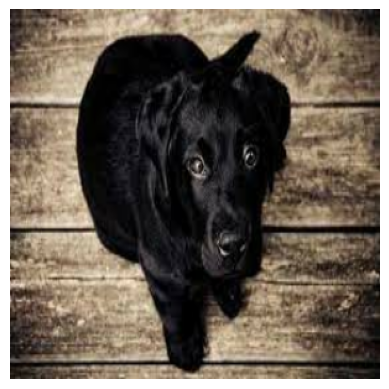


Input image size    : (1, 299, 299, 3)
Feature vector size : (1, 8, 8, 2048)


In [13]:
img, feature_vector = get_feature_vector('/content/download.jpg')

plt.imshow(np.squeeze(img, axis=0))
plt.axis('off')
plt.show()

print()
print('Input image size    :', img.shape)
print('Feature vector size :', feature_vector.shape)